In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from skimage.io import imread
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from skimage.transform import resize
from keras.utils import to_categorical

In [ ]:
image_size = 321
batch_size = 10

target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

train_dataset_path = './tanah/train'
validation_dataset_path = './tanah/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                    target_size = (image_size, image_size),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    classes = [ '01-Aluvial','02-Andosol','03-Entisol','04-Humus','05-Inceptisol','06-Laterit','07-Kapur','08-Pasir'],
                                                    shuffle = True)

Found 720 images belonging to 8 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                                target_size = (image_size, image_size),
                                                                batch_size = batch_size,
                                                                class_mode = 'categorical',
                                                                classes = [ '01-Aluvial','02-Andosol','03-Entisol','04-Humus','05-Inceptisol','06-Laterit','07-Kapur','08-Pasir'],
                                                                shuffle = True)

Found 160 images belonging to 8 classes.


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'01-Aluvial': 0, '02-Andosol': 1, '03-Entisol': 2, '04-Humus': 3, '05-Inceptisol': 4, '06-Laterit': 5, '07-Kapur': 6, '08-Pasir': 7}
{'01-Aluvial': 0, '02-Andosol': 1, '03-Entisol': 2, '04-Humus': 3, '05-Inceptisol': 4, '06-Laterit': 5, '07-Kapur': 6, '08-Pasir': 7}


# membuat model

In [ ]:
IMG_SHAPE = (image_size, image_size, 3)
model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                        include_top=False,
                                        weights='imagenet')
model.trainable = False
# model.summary()

model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile("adam",loss="categorical_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 10, 10, 1024)      3228864   
 onal)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          294944    
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 global_average_pooling2d_4  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
Total params: 3524072 (13.44 MB)
Trainable params: 295

# melatih model

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

model.fit(train_generator,
          epochs=50,
          verbose=2,
          callbacks=[reduce_lr],
          validation_data=validation_generator)

Epoch 1/50
72/72 - 13s - loss: 1.3364 - acc: 0.5375 - val_loss: 0.7492 - val_acc: 0.7563 - lr: 0.0010 - 13s/epoch - 183ms/step
Epoch 2/50
72/72 - 11s - loss: 0.3861 - acc: 0.8764 - val_loss: 0.3039 - val_acc: 0.9062 - lr: 0.0010 - 11s/epoch - 152ms/step
Epoch 3/50
72/72 - 11s - loss: 0.1187 - acc: 0.9667 - val_loss: 0.2571 - val_acc: 0.9312 - lr: 0.0010 - 11s/epoch - 154ms/step
Epoch 4/50
72/72 - 11s - loss: 0.0543 - acc: 0.9917 - val_loss: 0.2066 - val_acc: 0.9563 - lr: 0.0010 - 11s/epoch - 152ms/step
Epoch 5/50
72/72 - 11s - loss: 0.0489 - acc: 0.9875 - val_loss: 0.1928 - val_acc: 0.9688 - lr: 0.0010 - 11s/epoch - 153ms/step
Epoch 6/50
72/72 - 11s - loss: 0.0247 - acc: 1.0000 - val_loss: 0.1960 - val_acc: 0.9375 - lr: 0.0010 - 11s/epoch - 155ms/step
Epoch 7/50
72/72 - 11s - loss: 0.0217 - acc: 0.9958 - val_loss: 0.1369 - val_acc: 0.9750 - lr: 0.0010 - 11s/epoch - 157ms/step
Epoch 8/50
72/72 - 12s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.1188 - val_acc: 0.9750 - lr: 0.0010 - 12s/epo

# grafik hasil model pelatihan

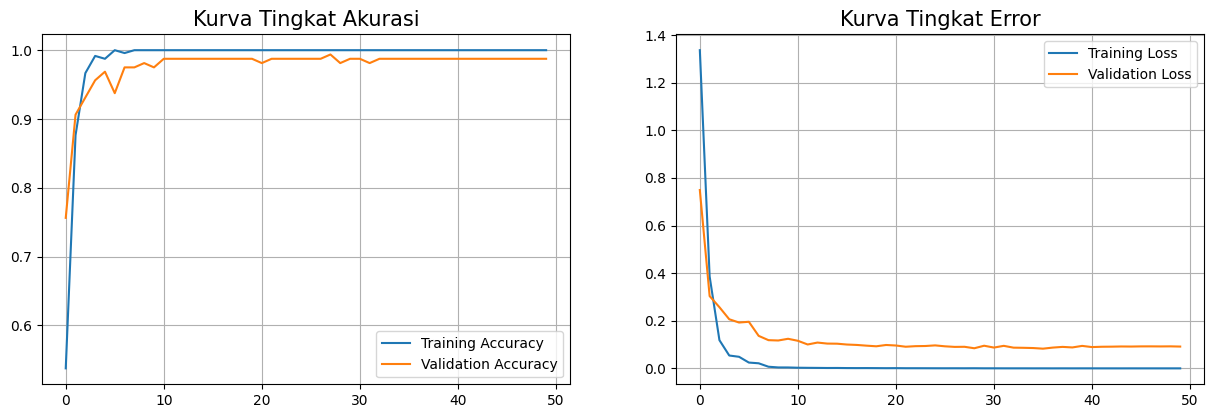

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 4))
fig.set_figheight(10)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(model.history.history["acc"],label = "Training Accuracy")
plt.plot(model.history.history["val_acc"],label = "Validation Accuracy")
plt.legend()
plt.title("Kurva Tingkat Akurasi", size=15)
plt.grid(zorder = 0)

plt.subplot(2, 2, 2)
plt.plot(model.history.history["loss"],label = "Training Loss")
plt.plot(model.history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.title("Kurva Tingkat Error", size=15)
plt.grid(zorder = 0)
plt.show()

# menyimpan hasil model ke format h5

In [ ]:
model.save('./Output/Model.h5')

saved_model_dir = './Output'
tf.saved_model.save(model, saved_model_dir)

c:\Users\lusi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: ./Output\assets


INFO:tensorflow:Assets written to: ./Output\assets


# menyimpan dan konversi model ke tflite

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('./Output/Model.tflite', 'wb') as f:
  f.write(tflite_model)

target_names = ['Aluvial','Andosol','Entisol','Humus','Inceptisol','Laterit','Kapur','Pasir']
labels = '\n'.join(target_names)

with open('./Output/Model.txt', 'w') as f:
  f.write(labels)

In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

In [ ]:
ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "./Output/Model.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "./Output/Model.txt"
_SAVE_TO_PATH = "./Output/Metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)